In [ ]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Model Complexity and Overfitting
In this exercise, show that simpler models with fewer features may perform better on unseen data due to reduced risk of overfitting.

<article class="message">
    <div class="message-body">
        <strong>List of tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#poly_re">Task 1:  Re-use polynomial regression</a>
            </li>
            <li>
            <a href="#occam_train">Task 2: Train and evaluate linear models with po…</a>
            </li>
            <li>
            <a href="#plot_results">Task 3: Plot the polynomials (models)</a>
            </li>
            <li>
            <a href="#reflection">Task 4: Reflection</a>
            </li>
            <li>
            <a href="#Different_data_func">Task 5: Changing the data generating function</a>
            </li>
            <li>
            <a href="#reflection_failure">Task 6: Complex underlying true function</a>
            </li>
        </ul>
    </div>
</article>



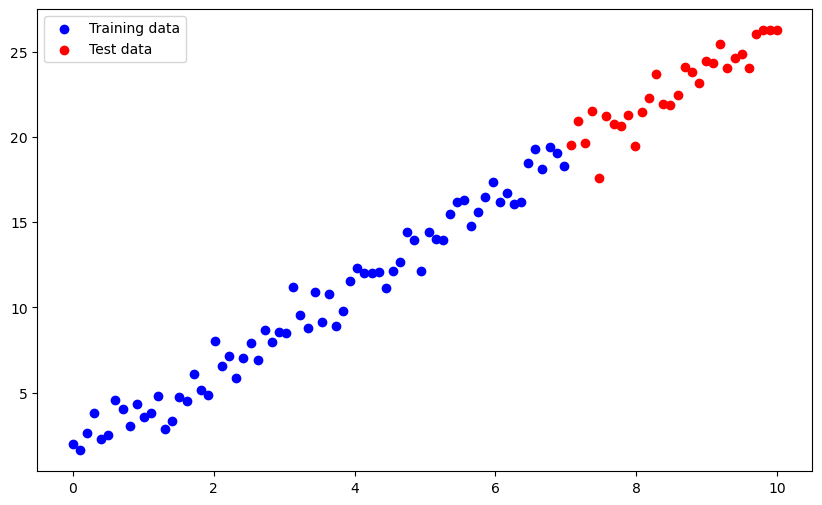

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 100
X = np.linspace(0, 10, n_samples).reshape(-1, 1)
y_true = 2.5 * X.ravel() + 1.5
noise = np.random.normal(0, 1, n_samples)
y = y_true + noise

# Split the data into training and test sets
split_index = int(0.7 * n_samples)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.legend()


---
**Task 1 (easy):  Re-use polynomial regression👩‍💻**
Insert/re-use the least square polynomial regression
 functions you implemented last week, in the cell below.

---

In [20]:
#### re-use / create desing matrix and polynomial regression functions
def create_design_matrix(X, degree):
    """
    Create a design matrix for polynomial regression.
    
    Parameters:
    - X: np.ndarray
        Input dataset (samples, 1).
    - degree: int
        Degree of the polynomial.
        
    Returns:
    - A: np.ndarray
        Design matrix with columns corresponding to X^0, X^1, ..., X^degree.
    """

    if degree < 1 or X.ndim != 1:
        return X

    count = X.shape[0]
    matrix = np.ones((count, degree + 1), np.float64)

    for i in range(1, degree+1):
        matrix[:, i] = X**i

    return matrix

def polynomial_regression(X, y, degree):
    """
    Compute the weights for polynomial regression using the least squares method.
    
    Parameters:
    - X: np.ndarray
        Input dataset (samples, 1).
    - y: np.ndarray
        Target values.
    - degree: int
        Degree of the polynomial.
        
    Returns:
    - w: np.ndarray
        Weights/coefficients for the polynomial regression.
    """
    #write code/solution here ...
    wtf = create_design_matrix(X, degree)

    return np.linalg.inv(wtf.T @ wtf) @ wtf.T @ y # TODO: What is this equation from?

def predict(X, w):
    """
    :param X: Input vector.
    :param w: Estimated parameters.
    
    :return: Predicted y-values.
    """

    res = []
    equ = w[0]

    for j in range(len(X)):
        equ = w[0]
        for i in range(1, len(w)):
            equ = equ + w[i] * (X[j]**i)
        
        res.append(equ)

    return res


---
**Task 2 (medium): Train and evaluate linear models with polynomial features👩‍💻**
1. Use the functions `polynomial_regression`
 and `create_design_matrix`
, to perform least square polynomial regression for each order in `degrees`
. 
2. Implement the function `compute_mse`
 that based on the predictions of a model and the ground truth targets return the _mean-squared-error_.


$$ MSE = \frac{1}{m}\sum_{i=1}^{m}(f_{\mathbf{w}}(x_{i})-y_{i})^2$$
3. For each polynomial model calculate the _mean-squared-error_ (use `polynomial_regression`
, `create_design_matrix`
, and `compute_mse`
).


---

In [23]:
def compute_mse(y_true, y_pred):
    """Compute Mean Squared Error between true and predicted values."""
    m = len(y_pred)
    e = [0]*m

    for i, y_hat in enumerate(y_pred):
        e[i] = (y_hat - y_true[i])**2

    return sum(e)/m

def get_flat(X):
    return X[:,0]


# Train and evaluate linear models with different polynomial features
train_errors = []
test_errors = []
predict_train = []
predict_test = []
w_s = []

degrees = [1, 2, 3, 4, 5, 6]

#write code/solution here ...
for degree in degrees:
    x_flat = get_flat(X_train)
    w = polynomial_regression(x_flat, y_train, degree)
    w_s.append(w)

    p_train = predict(X_train,w)
    p_test = predict(X_test, w)
    predict_train.append(p_train)
    predict_test.append(p_test)

    e_train = compute_mse(y_train, p_train)
    e_test = compute_mse(y_test, p_test)

    train_errors.append(e_train)
    test_errors.append(e_test)

print(train_errors)
print(test_errors)

[array([0.79703933]), array([0.7470722]), array([0.73084127]), array([0.72647663]), array([0.72584209]), array([0.71526473])]
[array([0.85702971]), array([2.92528783]), array([1.60858852]), array([7.98065696]), array([3.22706467]), array([3021.0110811])]



---
**Task 3 (easy): Plot the polynomials (models)👩‍💻**
1. Plot the predictions of the polynomial models using `X`
 as input.
2. Make scatterplots with both the training and test data points (in different colors).


---

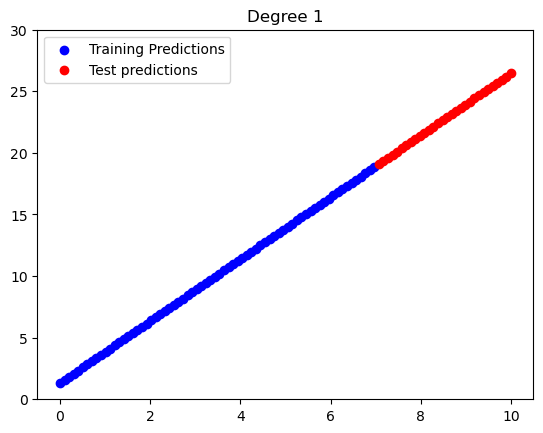

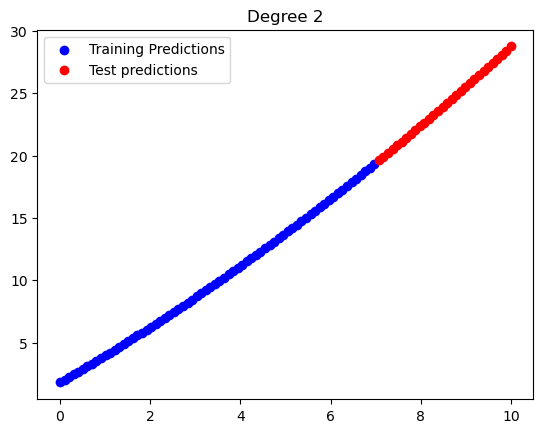

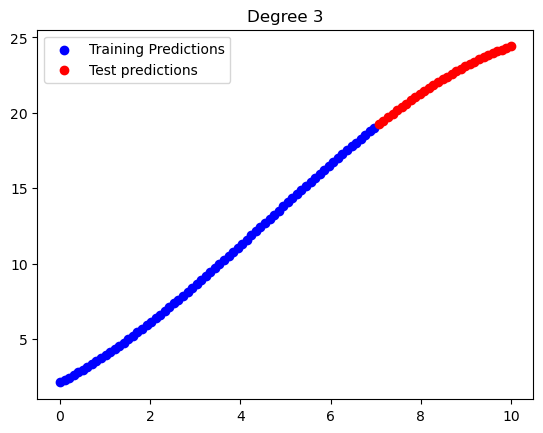

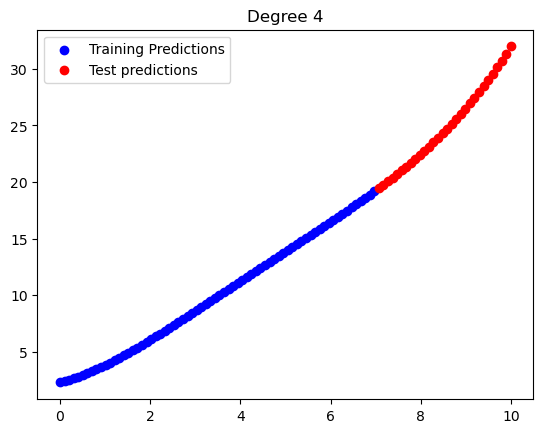

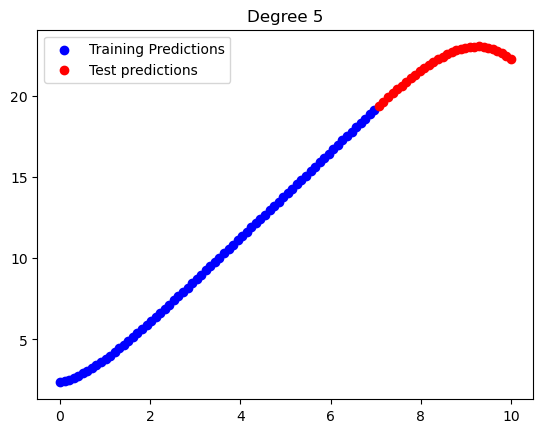

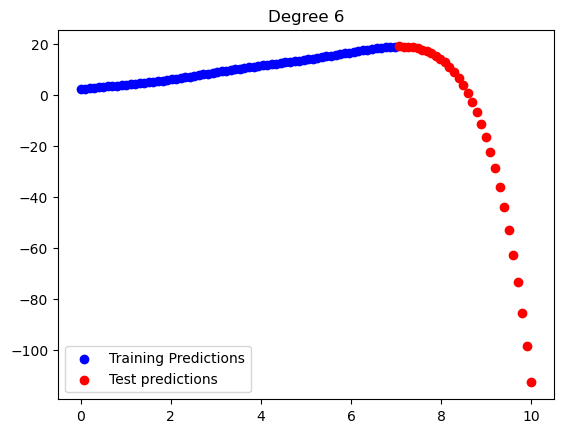

In [29]:
# Plot the results
# Insert code for question 1
# The following line keep axis fixed in a plot
plt.ylim(0,30)
for i in range(len(degrees)):
    x_flat = get_flat(X_train)
    plt.scatter(x_flat, predict_train[i], color="blue", label="Training Predictions")

    x_flat = get_flat(X_test)
    plt.scatter(x_flat,predict_test[i], color="red", label="Test predictions")
    plt.legend()
    plt.title(f"Degree {i+1}")
    plt.show()

# Insert code for question 2


---
**Task 4 (medium): Reflection💡**
Reflect upon the following questions:
1. Which model performed best on the training data?
2. Which model performed best on the test data?
3. How does the complexity (degree) of the model affect the performance on the training and test data?
4. Which model(s) shows signs of overfitting? How can you tell?


---

1. The model that performed best on the trainint data was the one with the highest degree(i.e. degree 6).
2. The model that performed best on the test data is the one with degree 1(i.e. the most simple model)
3. The higher the degree of the model the worse it gets. This is due to the model overfitting to the training data.
4. The last model(the one with degree 6) clearly shows that it overfits the training data. This can especially be seen by the drop it has in the test predictions and the mean square error. 


---
**Task 5 (medium): Changing the data generating function👩‍💻💡**
How does the results change if the underlying function generating the data is changed to a 2. order polynomial? 
1. Re-generate the data by replacing `y_true`
 with $y=f(x)=x^2+1.5x-3$ in the data generation step, and rerun the other code blocks.
2. Does it still make sense to follow the strategy of Occam's razor?


---

In [ ]:
# Write reflection


---
**Task 6 (hard): Complex underlying true function _(optional)_👩‍💻💡**
Repeat task 1-4 using the function: 

$$ f(x) = \sin(x^2) + 1.5 $$
as the data generating function, see code down below.
1. How do the polynomial models perform, compared to the generated data following a linear trend? 

2. How does the complexity of the model (in terms of the degree of the polynomial features) affect its performance on the training and test data?

3. Choose `np.sin`
-based kernels for the least squares fit instead. How do the models perform now? 

4. Reflect upon potential issues with using Occams's Razor for model selection in machine learning related tasks. 



---

In [ ]:
# Generate synthetic data sin
n_samples = 1000
X = np.linspace(0, 10, n_samples).reshape(-1, 1)
y_true =  np.sin(X.ravel()**2) + 1.5
noise = np.random.normal(0, .1, n_samples)
y = y_true + noise

... 
# repeat exercise here